# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('Coimbra_dataset.csv')
df['Classification'] = df['Classification']-1
df.shape

(116, 10)

---
# 3. independent variables

In [5]:
df.drop('Classification', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474282,8.352692,11.815970,38.040000
Resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000


---
# 4. dependent variable
* there are 64 Patients (1)
* there are 52 Healthy controls (0)

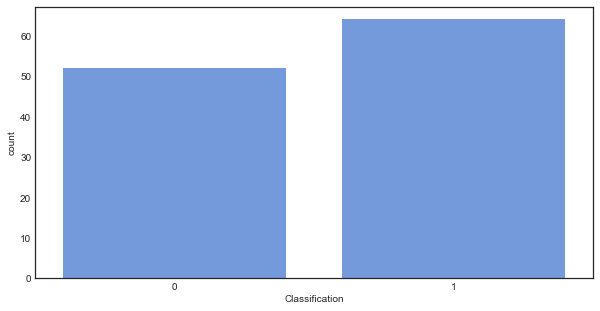

In [6]:
sns.countplot(df['Classification'], color='cornflowerblue');

---
# 5. Feature Importance

In [7]:
y = df['Classification']
x = df.drop('Classification', axis=1)

In [8]:
rforest = RandomForestClassifier(random_state = 42)
rforest.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

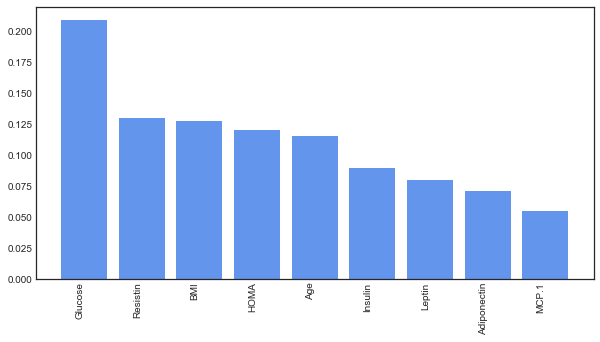

In [9]:
fimportance = rforest.feature_importances_
rf = pd.DataFrame([x.columns,fimportance]).transpose()
rf.columns = ['variable','importance']
rf = rf.sort_values(by='importance', ascending=False)
plt.bar(rf['variable'],rf['importance'],color='cornflowerblue')
plt.xticks(rotation=90, ha='right')
plt.show()

---
# 6. export dataset

In [10]:
df.to_csv('clean.csv', index=False)
df.shape

(116, 10)